In [16]:
import healpy as hp 
import sys
import os
import numpy as np
sys.path.append('../')
import matplotlib.pyplot as plt

In [17]:
%load_ext autoreload
%autoreload 2
from taunet.ncm import NoiseModel
from taunet.simulation import CMBspectra

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
ncm = NoiseModel()

In [14]:
e = ncm.Emode(23,unit='K')

In [18]:
cmb = CMBspectra()

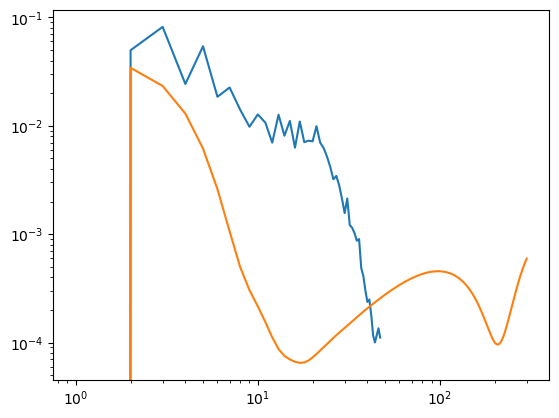

In [22]:
plt.loglog(hp.alm2cl(e)*1e12,label='E')
plt.loglog(cmb.EE,label='T')

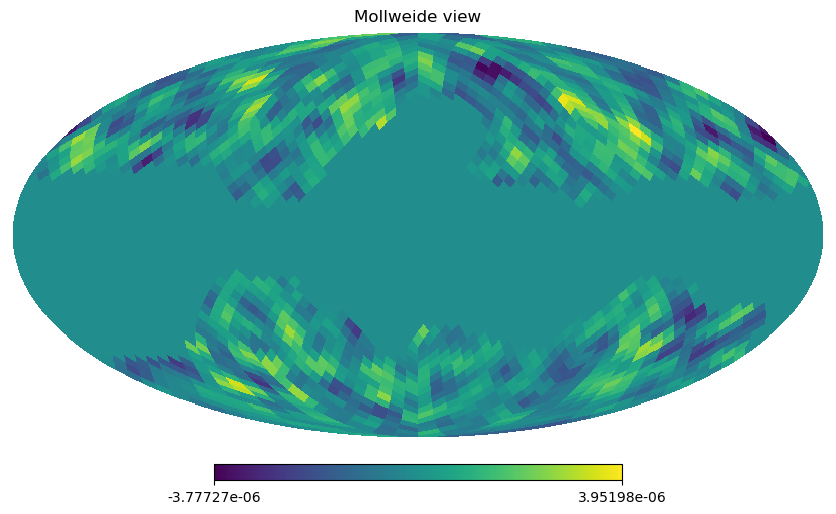

In [11]:
hp.mollview(ncm.noisemap(23,order='ring',unit='K')[0])

In [8]:
np.diag(ncm.get_full_ncm(100))[:1000]

array([0.06412632, 0.05910458, 0.06222956, 0.0677394 , 0.08781961,
       0.06122407, 0.07501174, 0.05888471, 0.07987726, 0.06545212,
       0.09166286, 0.06860928, 0.09583739, 0.07577461, 0.06227307,
       0.07500701, 0.05964378, 0.06518745, 0.08379181, 0.07109076,
       0.07195093, 0.0959734 , 0.0838184 , 0.07674   , 0.0966108 ,
       0.09111463, 0.06617137, 0.06179374, 0.07148936, 0.06335553,
       0.05616909, 0.06887489, 0.08271378, 0.07884824, 0.06929237,
       0.07649814, 0.09635448, 0.09679999, 0.08241806, 0.08298988,
       0.09100647, 0.09226779, 0.0776106 , 0.06056661, 0.06037376,
       0.06758378, 0.06355816, 0.05595936, 0.05747886, 0.07166726,
       0.08274523, 0.08037645, 0.07311726, 0.07166218, 0.080144  ,
       0.09648569, 0.10340743, 0.09497833, 0.0845505 , 0.08317081,
       0.08870774, 0.0927892 , 0.08318624, 0.06643418, 0.05615313,
       0.05832794, 0.06417191, 0.06197325, 0.0563452 , 0.05313251,
       0.0621839 , 0.07920263, 0.08955916, 0.08600331, 0.07595

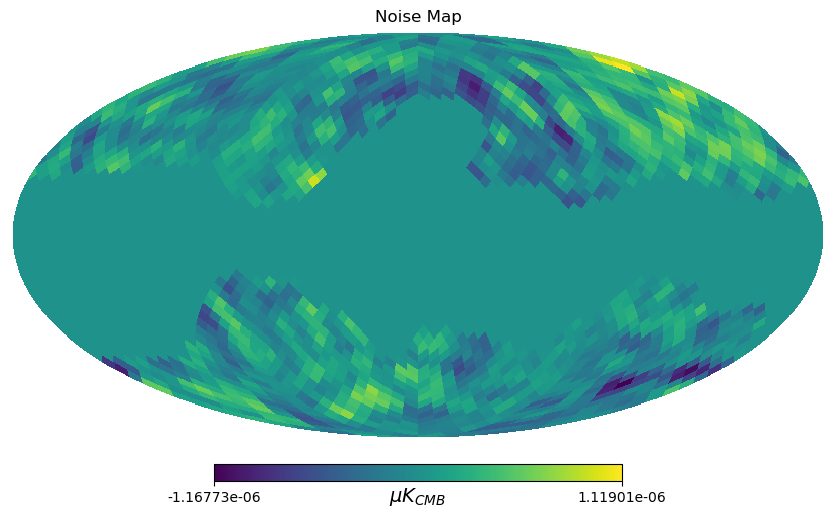

In [10]:
hp.mollview(ncm.noisemap(100,order='nested',unit='K')[0], title='Noise Map', unit=r'$\mu K_{CMB}$', nest=True)

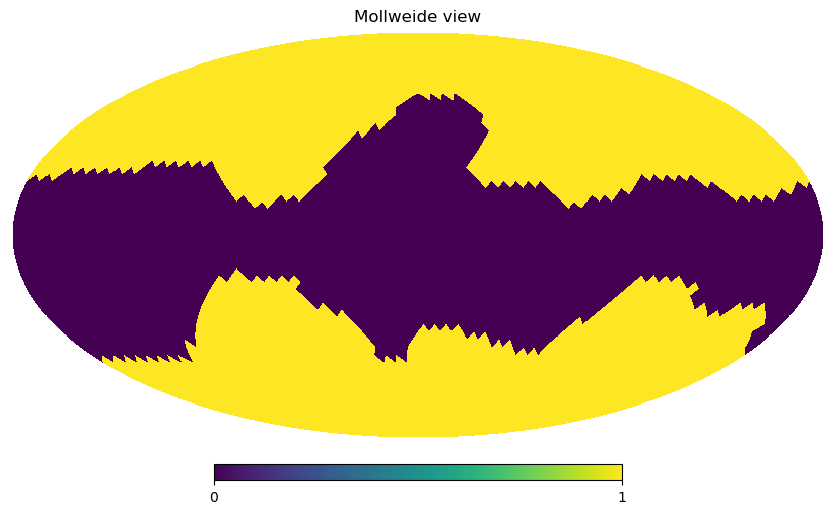

In [5]:
hp.mollview(ncm.polmask('nested'),nest=True)

In [6]:
main_dir = '/marconi/home/userexternal/aidicher/storage/TAUNET'
ncm_dir = os.path.join(main_dir,'NCM')
os.makedirs(ncm_dir,exist_ok=True)

In [7]:
for f in [30,100,143,353]:
    cov = ncm.get_full_ncm(143,unit='K',pad_temp=True,reshape=True,order='nested')
    cov.tofile(os.path.join(ncm_dir,'ncm_{}.bin'.format(f)))

In [15]:
mask = ncm.polmask('nested')

In [16]:
hp.write_map(os.path.join(main_dir,'mask.fits'),[mask,mask,mask],nest=True,overwrite=True)

setting the output map dtype to [dtype('float32'), dtype('float32'), dtype('float32')]
